In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# get the absolute path of the running python file
code_filepath = os.path.abspath("__file__")

titanic_dir = os.path.dirname(os.path.dirname(code_filepath))

# get the data file
data_filepath = os.path.join(titanic_dir, "data", "train.csv")

# read .csv data file to pandas data frame
data = pd.read_csv(data_filepath)

In [2]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking for null 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Fill na values in Cabin with Unknown:
data['Cabin'].fillna('Unknown', inplace= True)

In [5]:
#replace missing age with passengers average age 
data['Age']=data['Age'].fillna(data['Age'].mean())

In [6]:
#Fill na values in Embarked columns:
data['Embarked'].fillna('Unknown', inplace= True)


In [7]:
#extracting Initial from Names: 
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
data['Title'] = data['Title'].apply(lambda x: 'Other' if ((x != 'Mr') and (x != 'Miss') and (x != 'Mrs')) else x)#
data['Title'].value_counts().sort_values()


Other     63
Mrs      126
Miss     185
Mr       517
Name: Title, dtype: int64

In [8]:
data.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148,4,4
top,NaN,NaN,NaN,"Baclini, Mrs. Solomon (Latifa Qurban)",male,NaN,NaN,NaN,347082,NaN,Unknown,S,Mr
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,644,517
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


In [9]:
#plotting some columns to see relationship between features and survival rate, e.g. sex, class, etc...

In [10]:
sex_survived=data[data['Survived']==1]['Sex'].value_counts()
sex_survived


female    233
male      109
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Survival by sex group')

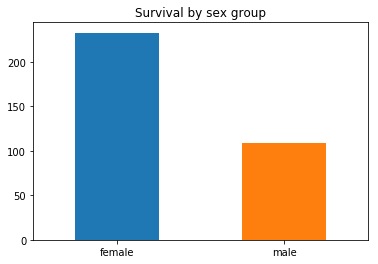

In [11]:
sex_survived.plot.bar(rot=0)
plt.title('Survival by sex group')


Text(0.5, 1.0, 'Survival by passenger Class')

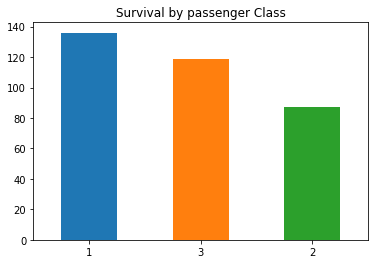

In [12]:
class_survived=data[data['Survived']==1]['Pclass'].value_counts()
class_survived.plot.bar(rot=0)
plt.title('Survival by passenger Class')


the plots above show only the number of survivals in each features, however this can be misleading or incomplete i.e. the number of male/female passengers and between different class can be very different. To see a better picture, we should see the relative survival rate of each sex and class and compare them with average survival rate of all passengers


Text(0.5, 1.0, 'Survival ratio by Sex')

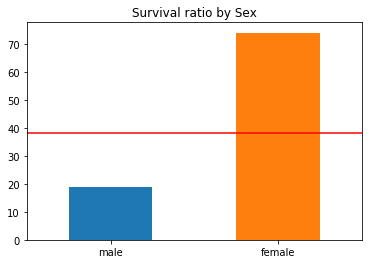

In [13]:
passenger_sex = data['Sex'].value_counts()
data_by_sex=pd.concat([passenger_sex,sex_survived], axis=1, sort=False)
data_by_sex.columns=['Total', 'Survived']

survival_rate=data[data['Survived']==1].shape[0]/data.shape[0]*100

sex_survived_ratio= data_by_sex['Survived']/data_by_sex['Total']*100
sex_survived_ratio.plot.bar(rot=0)
plt.axhline(survival_rate, color='red')
plt.title('Survival ratio by Sex')



Text(0.5, 1.0, 'Survival ratio by Class')

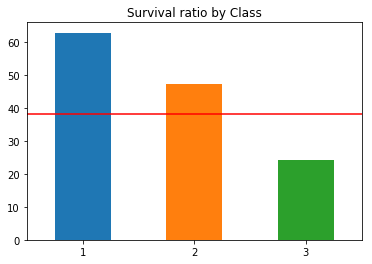

In [14]:
passenger_class=data['Pclass'].value_counts()
data_by_class= pd.concat([passenger_class, class_survived], axis=1, sort=False)
data_by_class.columns=['Total', 'Survived']
class_survived_ratio = data_by_class['Survived']/data_by_class['Total']*100
class_survived_ratio.plot.bar(rot=0)
plt.axhline(survival_rate, color='red')
plt.title('Survival ratio by Class')

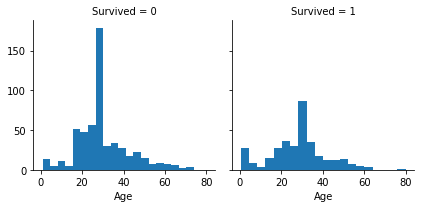

In [15]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)



# Random Forest

In [16]:
#initiate model:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=2)

test_path= os.path.join(titanic_dir, "data", "test.csv")
df_tst= pd.read_csv(test_path)


In [17]:
#fit and train dataset:
data_rf=data.drop(['Survived','PassengerId'],axis=1)

#Extracting Initial from Name columns in test set: 
df_tst['Title'] = df_tst['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df_tst['Title'] = df_tst['Title'].replace('Ms', 'Miss')
df_tst['Title'] = df_tst['Title'].replace('Mlle', 'Miss')
df_tst['Title'] = df_tst['Title'].replace('Mme', 'Mrs')
df_tst['Title'] = df_tst['Title'].apply(lambda x: 'Other' if ((x != 'Mr') and (x != 'Miss') and (x != 'Mrs')) else x)
df_tst['Age']=df_tst['Age'].fillna(df_tst['Age'].mean())
df_tst['Fare']=df_tst['Fare'].fillna(df_tst['Fare'].mode()[0])

#removing Cabin & Ticket columns:
data_dropped = data_rf.drop(['Cabin','Name', 'Ticket'], axis=1)
data_dropped['Embarked']= data_dropped['Embarked'].replace('Unknown', data_dropped['Embarked'].mode()[0])
test_dropped = df_tst[data_dropped.columns]

#one-hot encoding with categorical features:
df_training_dummies= pd.get_dummies(data_dropped, columns=['Pclass','Sex','Embarked','Title'])
df_test_dummies= pd.get_dummies(test_dropped, columns=['Pclass','Sex','Embarked',"Title"])




In [18]:
#fit and predicts:

X_df=df_training_dummies
y_df=data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state =19)


In [19]:
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [20]:
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Fare', 0.24),
 ('Age', 0.23),
 ('Sex_female', 0.09),
 ('Title_Mr', 0.09),
 ('Sex_male', 0.08),
 ('SibSp', 0.05),
 ('Pclass_3', 0.05),
 ('Parch', 0.04),
 ('Pclass_1', 0.03),
 ('Pclass_2', 0.02),
 ('Title_Miss', 0.02),
 ('Title_Mrs', 0.02),
 ('Embarked_C', 0.01),
 ('Embarked_Q', 0.01),
 ('Embarked_S', 0.01),
 ('Title_Other', 0.01)]

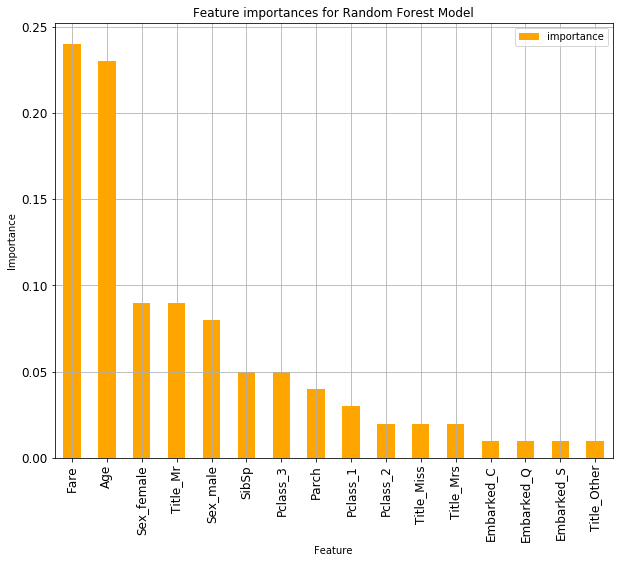

In [21]:
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(10,8),
        title= 'Feature importances for Random Forest Model',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Feature")

# Set the y-axis label
ax.set_ylabel("Importance");

Text(0.5, 1.0, 'Actual vs. Predicted Confusion Matrix')

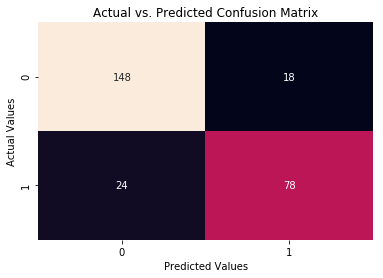

In [22]:
y_pred = model.predict(X_test)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')

In [23]:
print("model accuracy:", metrics.accuracy_score(y_test, y_pred)* 100)

model accuracy: 84.32835820895522


In [24]:
predictions_prob = model.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds  = metrics.roc_curve(y_test,
                                  predictions_prob,
                                  pos_label = 1)
auc_rf = metrics.auc(fpr2, tpr2)
auc_rf


0.8836522560831561

In [25]:
predictions=model.predict(df_test_dummies).astype(int)
pd.DataFrame({'PassengerId':df_tst['PassengerId'],'Survived': predictions}).to_csv('./randomforest_1.csv',index=False)